In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
    
df = pd.read_csv('gplus_combined.txt', delimiter=' ')
edges_list = [(df.iloc[i, 0], df.iloc[i, 1]) for i in range(len(df))]

gplus_graph = nx.DiGraph()
gplus_graph.add_edges_from(edges_list)

In [7]:
import pickle

filename = 'gplus_graph.pkl'
with open(filename, 'wb') as file:
    pickle.dump(gplus_graph, file)

In [2]:
import pickle

with open( 'gplus_graph.pkl', 'rb') as file:
    gplus_graph = pickle.load(file)

In [74]:
#closeness_centrality_scores = nx.closeness_centrality(G_copy)
#betweenness_centrality_scores = nx.betweenness_centrality(G_copy)
pagerank_centrality_scores = nx.pagerank(gplus_graph)
out_degree_centrality_scores = dict(list(gplus_graph.out_degree()))

In [124]:
nodes = [n for n in list(gplus_graph.nodes)]

# centrality_df = pd.DataFrame.from_dict({"Node": nodes, "Closeness Centrality Score": list(closeness_centrality_scores.values()), "Betweenness Centrality Score": list(betweenness_centrality_scores.values()),
#                                        "Out Degree Centrality Score": list(degree_centrality_scores.values()), "PageRank Centrality Scores": list(evect_centrality_scores.values())})
centrality_df = pd.DataFrame.from_dict({"Node": nodes,"Out Degree Centrality Score": list(out_degree_centrality_scores.values()), "PageRank Centrality Scores": list(pagerank_centrality_scores.values())})
centrality_df.set_index("Node", inplace = True)

centrality_df.to_csv('gplus_centrality.csv')

In [3]:
import random

def sample_subgraph(G, target_size):
    if len(G.nodes) <= target_size:
        return G.copy()  # No need to sample if the graph is already smaller than the target size

    # Select any random node (selecting random node among only highest degree nodes makes it nearly impossible to reach lower degree nodes for smaller target_size)
    start_node = random.choice(list(G.nodes))

    # Perform BFS expansion until we reach the required size
    sampled_nodes = set([start_node])
    queue = [start_node]

    while len(sampled_nodes) < target_size and queue:
        node = queue.pop(0)
        neighbors = list(G.neighbors(node))
        random.shuffle(neighbors)  # Shuffle to avoid order bias

        for neighbor in neighbors:
            if neighbor not in sampled_nodes:
                sampled_nodes.add(neighbor)
                queue.append(neighbor)
            if len(sampled_nodes) >= target_size:
                break

    # Ensure the subgraph has the correct node labels
    return G.subgraph(sampled_nodes).copy()

# Betweenness Centrality Estimation

In [3]:
betweenness_centrality_values = {}
subgraphs = []

for i in gplus_graph.nodes:
    betweenness_centrality_values[i] = []

In [43]:
import time

subgraphs = []

for i in range(200):
    start_time = time.time()
    G_sub = sample_subgraph(gplus_graph, 4039)
    subgraphs.append(G_sub)
    scores = nx.betweenness_centrality(G_sub)

    for node in scores:
        betweenness_centrality_values[node].append(scores[node])

    print(f"Iteration {i} took {time.time() - start_time} seconds")

Iteration 0 took 381.1364018917084 seconds
Iteration 1 took 0.003014087677001953 seconds
Iteration 2 took 237.29021668434143 seconds
Iteration 3 took 238.68959403038025 seconds
Iteration 4 took 211.41689324378967 seconds
Iteration 5 took 244.39077830314636 seconds
Iteration 6 took 0.0020041465759277344 seconds
Iteration 7 took 0.002000570297241211 seconds
Iteration 8 took 0.0020034313201904297 seconds
Iteration 9 took 566.473137140274 seconds
Iteration 10 took 0.0030052661895751953 seconds
Iteration 11 took 0.0009918212890625 seconds
Iteration 12 took 0.0029981136322021484 seconds
Iteration 13 took 0.0030007362365722656 seconds
Iteration 14 took 284.52715969085693 seconds
Iteration 15 took 0.001999378204345703 seconds
Iteration 16 took 187.06380534172058 seconds
Iteration 17 took 636.6375796794891 seconds
Iteration 18 took 299.97673177719116 seconds
Iteration 19 took 305.65385270118713 seconds
Iteration 20 took 236.75887298583984 seconds
Iteration 21 took 0.002007722854614258 seconds
I

In [49]:
centrality_values = []
no_count = 0

for node in betweenness_centrality_values:
    if len(betweenness_centrality_values[node]) == 0:
        centrality_values.append(0)
        no_count += 1

    else:
        centrality_values.append(np.mean(betweenness_centrality_values[node]))

print(no_count)
centrality_df = pd.read_csv('gplus_centrality.csv', index_col = "Node")
centrality_df["Betweenness Centrality Score"] = centrality_values
centrality_df.to_csv('gplus_centrality.csv')

31390


The proportion of bottleneck nodes to all nodes is 0.10000557548274389


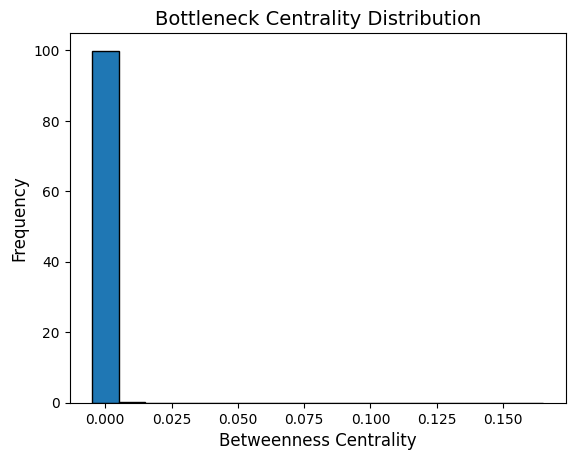

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

centrality_df = pd.read_csv('gplus_centrality.csv', index_col="Node")

# Calculate the cutoff for top 10 percentile of betweenness centrality
cutoff = np.percentile(centrality_df.loc[:, "Betweenness Centrality Score"], 90)
bottlenecks = []

# Collect bottleneck nodes
for node in list(gplus_graph.nodes):
    if centrality_df.loc[node, "Betweenness Centrality Score"] >= cutoff:
        bottlenecks.append(centrality_df.loc[node, "Betweenness Centrality Score"])

print(f"The proportion of bottleneck nodes to all nodes is {len(bottlenecks) / len(list(gplus_graph.nodes))}")

plt.hist(bottlenecks, align='left', bins= bins, edgecolor = "Black", density=True)
plt.xlabel("Betweenness Centrality", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title("Bottleneck Centrality Distribution", fontsize = 14)
plt.show()

The proportion of bottleneck nodes to all nodes is 0.0024758603614756128


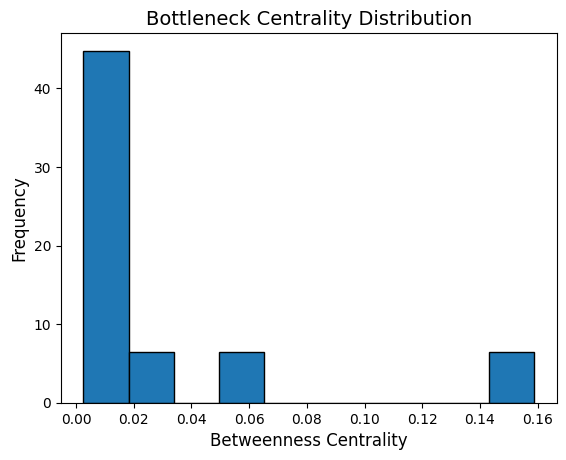

In [73]:
# look at distribution of bottlenecks?

# bottleneck = node with betweenness centrality in top 10 percentile (from unique values that are rounded)
centrality_df = pd.read_csv('gplus_centrality.csv', index_col = "Node")
cutoff = np.percentile(np.unique(np.round(centrality_df.loc[:, "Betweenness Centrality Score"], 4)), 90)
bottlenecks = []

for node in list(gplus_graph.nodes):
    if centrality_df.loc[node, "Betweenness Centrality Score"] >= cutoff:
        bottlenecks.append(centrality_df.loc[node, "Betweenness Centrality Score"])

print(f"The proportion of bottleneck nodes to all nodes is {len(bottlenecks)/4039}")
plt.hist(bottlenecks, align='left', edgecolor = "Black", density=True)
plt.xlabel("Betweenness Centrality", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title("Bottleneck Centrality Distribution", fontsize = 14)
#plt.savefig('facebook_bottleneck_distribution.png')
plt.show()

# Shortest Path Lengths estimation

In [4]:
from collections import defaultdict
path_lengths_dict = defaultdict(lambda: defaultdict(lambda: 10))

In [8]:
num_nodes = len(list(gplus_graph.nodes))
path_lengths_matrix = np.ones((num_nodes, num_nodes))*10

MemoryError: Unable to allocate 86.3 GiB for an array with shape (107614, 107614) and data type float64

In [5]:
import time
import pickle

for i in range(200):
    G_sub = sample_subgraph(gplus_graph, 2000)
    path_lengths = dict(nx.shortest_path_length(G_sub))
    start_time =  time.time()
    
    for j in list(path_lengths.keys()):
        for k in path_lengths[j]:
            if path_lengths[j][k] < path_lengths_dict[j][k]:
                path_lengths_dict[j][k] = path_lengths[j][k]

    print(f"Iteration {i} took {time.time() - start_time} seconds")

Iteration 0 took 0.0 seconds
Iteration 1 took 0.0 seconds
Iteration 2 took 0.0 seconds
Iteration 3 took 1.7599010467529297 seconds
Iteration 4 took 1.614332914352417 seconds
Iteration 5 took 1.469759225845337 seconds
Iteration 6 took 0.0 seconds
Iteration 7 took 1.2523798942565918 seconds
Iteration 8 took 1.518772840499878 seconds
Iteration 9 took 0.0 seconds
Iteration 10 took 1.5276873111724854 seconds
Iteration 11 took 0.0 seconds
Iteration 12 took 1.5629603862762451 seconds
Iteration 13 took 1.4810829162597656 seconds
Iteration 14 took 1.5275967121124268 seconds
Iteration 15 took 0.0 seconds
Iteration 16 took 0.0 seconds
Iteration 17 took 0.0 seconds
Iteration 18 took 1.204329252243042 seconds
Iteration 19 took 1.5743317604064941 seconds
Iteration 20 took 1.6742291450500488 seconds
Iteration 21 took 1.4696967601776123 seconds
Iteration 22 took 1.6239778995513916 seconds
Iteration 23 took 1.6595723628997803 seconds
Iteration 24 took 1.3923494815826416 seconds
Iteration 25 took 0.0 se

In [7]:
from itertools import product

path_lengths = []
no_count = 0

# Use itertools.product to iterate through all pairs of i and j
for i, j in product(range(107614), repeat=2):
    path_data = path_lengths_dict[i][j]

    if path_data != 10:
        path_lengths.append(np.min(path_data))

MemoryError: 

In [ ]:
plt.hist(path_lengths, bins=range(int(max(path_lengths))+2), align='left', edgecolor = "Black")
plt.xlabel("Path Length")
plt.ylabel("Frequency")
plt.title("Shortest Path Length Distribution")
plt.savefig('gplus_shortest_path_lengths.png')
plt.show()